<a href="https://colab.research.google.com/github/0523Juyang/titanic-analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_01_%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 專題實作 #01 鐵達尼號存活預測專題實作

In [ ]:
import pandas as pd
import numpy as np

<ipython-input-2-b0ae7da4faf6>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survived_corr.values, y=survived_corr.index, palette='vlag')


--- 資料載入完成 (使用原始數據) ---
接下來的分析將直接使用原始數據，不會對缺失值進行填充。
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4  

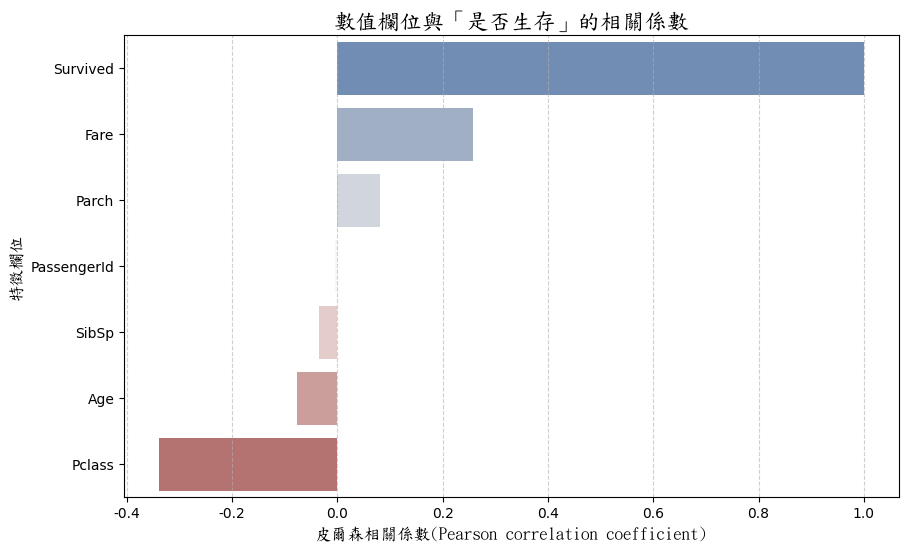

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as plt_font
import seaborn as sns
from scipy.stats import chi2_contingency

# 設定 Matplotlib 顯示中文字體
# 這將確保圖表中的中文能正確顯示
twfont1 = plt_font.FontProperties(fname='/content/kaiu.ttf')
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'Heiti TC', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False # 用來正常顯示負號

# --- 1. 載入資料 (不修改任何值) ---
try:
    # 載入您提供的 train.csv 檔案
    df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')

    # 建立一個資料副本以進行操作，注意：我們不會填充任何缺失值
    df_processed = df.copy()

    print("--- 資料載入完成 (使用原始數據) ---")
    print("接下來的分析將直接使用原始數據，不會對缺失值進行填充。")
    print(df_processed.head())
    print("\n檢查原始數據中的缺失值:")
    print(df_processed.isnull().sum())
    print("-" * 30 + "\n")

except FileNotFoundError:
    print("錯誤：找不到 'train.csv' 檔案。請確保檔案與腳本在同一個目錄下。")
    # 如果找不到檔案，則停止執行後續程式碼
    exit()


# --- 2. 數值欄位與生存的關係 ---
# 備註: .corr() 方法預設會以成對方式 (pairwise) 排除 NA/null 值。
# 因此，對於 'Age' 的相關係數計算，將只針對 'Age' 不是空值的行。
print("--- 數值欄位 vs. 是否生存 (相關係數分析 - 基於原始數據) ---")
# 挑選數值型別的欄位與 'Survived'
numeric_features = df_processed.select_dtypes(include=np.number)

# 計算相關係數矩陣
correlation_matrix = numeric_features.corr()

# 提取與 'Survived' 欄位的相關性，並按數值大小排序
survived_corr = correlation_matrix['Survived'].sort_values(ascending=False)

print("各數值欄位與「是否生存」的相關係數:")
print(survived_corr)

# 視覺化
plt.figure(figsize=(10, 6))
sns.barplot(x=survived_corr.values, y=survived_corr.index, palette='vlag')
plt.title('數值欄位與「是否生存」的相關係數',fontproperties=twfont1, fontsize=16)
plt.xlabel('皮爾森相關係數(Pearson correlation coefficient)',fontproperties=twfont1, fontsize=12)
plt.ylabel('特徵欄位',fontproperties=twfont1, fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()